# Лабораторна робота 2.

## Створення штучно синтезованих наборів даних

**Лабораторна робота виконується індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Завдання 1: Синтезувати набір даних, який складається з двох лінійно роздільних множин, що можуть бути використані для навчання моделей класифікації.**


**Роз'яснення до завдання 1:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Обидва класи мають бути лінійно роздільні, тобто можна знайти таку пряму, яка розділяє дані двох класів без помилок.
   - Дані повинні бути рівномірно розподілені по всьому простору, але з певним відхиленням для забезпечення реалістичності.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів двох класів.
     - Додавання невеликого шуму до кожного класу для забезпечення варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Перевірка лінійної роздільності: Побудуйте графік з нанесеними точками і покажіть лінію, яка розділяє два класи.

5. **Додаткові умови:**
- Зробіть аналіз набору даних, побудувавши гістограми розподілу даних для кожного класу окремо.
- Опишіть підходи, які використовувалися для створення набору даних.

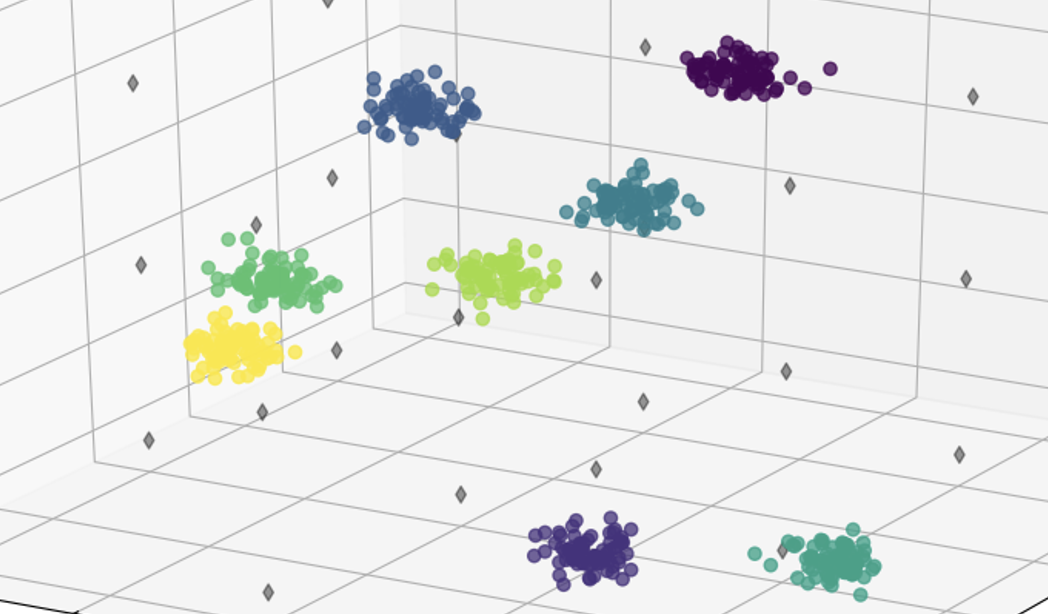

In [218]:
def generate_data(num_points, center, spread, point_class):
    x = random.normal(center[0], spread, num_points)
    y = random.normal(center[1], spread, num_points)
    return [{'x': xi, 'y': yi, 'class': point_class} for xi, yi in zip(x, y)]

def create_dataset(num_points_per_class, centers, spread):
    data = []
    for point_class, center in centers.items():
        data.extend(generate_data(num_points_per_class, center, spread, point_class))
    return pd.DataFrame(data)

num_points_per_class = 500
centers = {'1': (1, 1), '2': (-1, -1)}
spread = 0.3
dataset = create_dataset(num_points_per_class, centers, spread)
dataset.to_csv('practice2.csv', index=False)

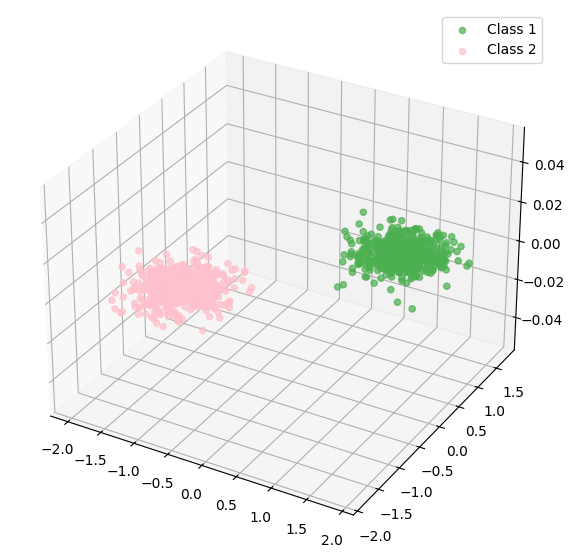

In [219]:

def plot_3d_scatter(dataset, classes, colors, alpha=0.7, figsize=(10, 7)):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(projection='3d')
    
    for point_class, color in zip(classes, colors):
        class_data = dataset[dataset['class'] == point_class]
        ax.scatter(class_data['x'], class_data['y'], color=color, alpha=alpha, label=f'Class {point_class}')
    
    ax.legend()
    plt.show()

classes = ['1', '2']
colors = ['#4CAF50', '#FFC0CB']

plot_3d_scatter(dataset, classes, colors)


**Завдання 2: Синтезувати набір даних, який складається з трьох множин (класів), що мають часткове перекриття, для використання в задачах класифікації та аналізу даних.**

**Роз'яснення до завдання 2:**

1. **Опис набору даних:**
   - Набір даних повинен містити три класифікаційні мітки (клас 1, клас 2, клас 3).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані мають утворювати три множини, кожна з яких розподілена навколо свого центру, але з перекриттям з іншими множинами.
   - Кожен клас повинен мати певну ступінь перекриття з іншими класами, що призводить до часткової змішуваності точок з різними мітками.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів кожного класу.
     - Додавання більшого шуму або кореляції між точками для збільшення ступеня перекриття.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **300** для кожного класу (всього **900**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **900** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для всіх трьох класів, щоб візуалізувати перекриття множин.
   - Перевірте, чи дійсно дані утворюють перекриття між класами, показавши частку точок, які належать до зон перекриття.

5. **Додаткові умови:**
   - Побудуйте кореляційні графіки та гістограми розподілу для кожного класу.
   - Опишіть підходи, які використовувалися для створення набору даних, і обґрунтуйте вибір параметрів.

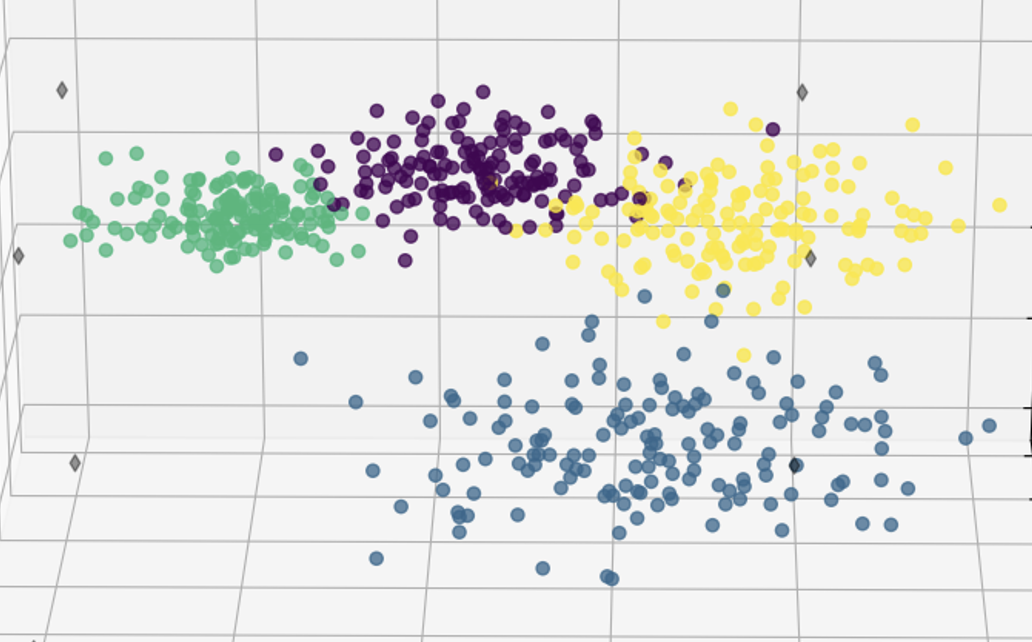

In [220]:
def generate_data(num_points, center, spread, point_class):
    x = random.normal(center[0], spread, num_points)
    y = random.normal(center[1], spread, num_points)
    return [{'x': xi, 'y': yi, 'class': point_class} for xi, yi in zip(x, y)]

def create_dataset(params):
    data = []
    for param in params:
        data.extend(generate_data(param['num_points'], param['center'], param['spread'], param['class']))
    return pd.DataFrame(data)

params = [
    {'num_points': 300, 'center': (1, 1), 'spread': 0.5, 'class': '1'},
    {'num_points': 300, 'center': (-1, -1), 'spread': 0.5, 'class': '2'},
    {'num_points': 300, 'center': (1, -1), 'spread': 0.5, 'class': '3'}
]

dataset = create_dataset(params)
dataset.to_csv('practice2_task2.csv', index=False)

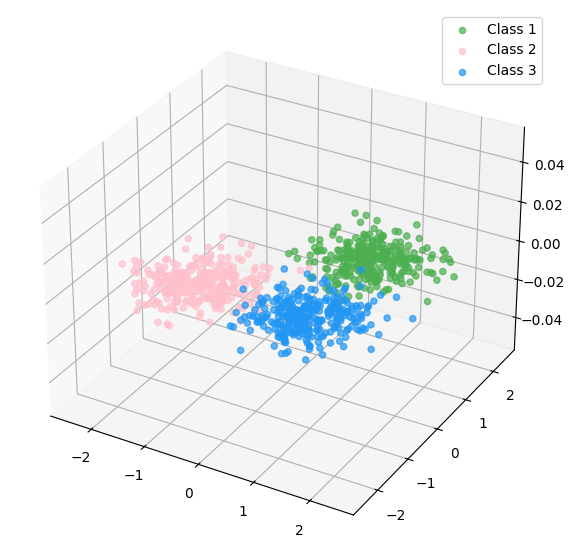

In [221]:
def plot_3d_scatter(dataset, classes, colors, alpha=0.7, figsize=(10, 7)):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(projection='3d')
    
    for point_class, color in zip(classes, colors):
        class_data = dataset[dataset['class'] == point_class]
        ax.scatter(class_data['x'], class_data['y'], color=color, alpha=alpha, label=f'Class {point_class}')
    
    ax.legend()
    plt.show()

classes = ['1', '2', '3']
colors = ['#4CAF50', '#FFC0CB', '#2196F3']
plot_3d_scatter(dataset, classes, colors)


**Завдання 3: Синтезувати набір даних, який складається з двох множин у формі "тор в торі", де одна множина має форму внутрішнього тора, а інша — зовнішнього тора.**

**Роз'яснення до завдання 3:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві множини у формі тора: одна множина повинна бути розташована всередині іншої (тобто, "тор в торі").
   - Внутрішній тор (клас 1) повинен мати менший радіус і ширину, ніж зовнішній тор (клас 2).
   - Розподіл точок повинен бути рівномірним вздовж кожного тора з додаванням невеликого шуму для забезпечення варіативності.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y) $і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох класів, щоб візуалізувати форму "тор в торі".
   - Перевірте розподіл точок уздовж кожного тора, побудувавши радіальні гістограми для кожного класу.

5. **Додаткові умови:**
   - Побудуйте окремі графіки, які демонструють розподіл даних для кожного тора окремо.
   - Опишіть процес генерації даних та поясніть вибір параметрів для кожного тора.

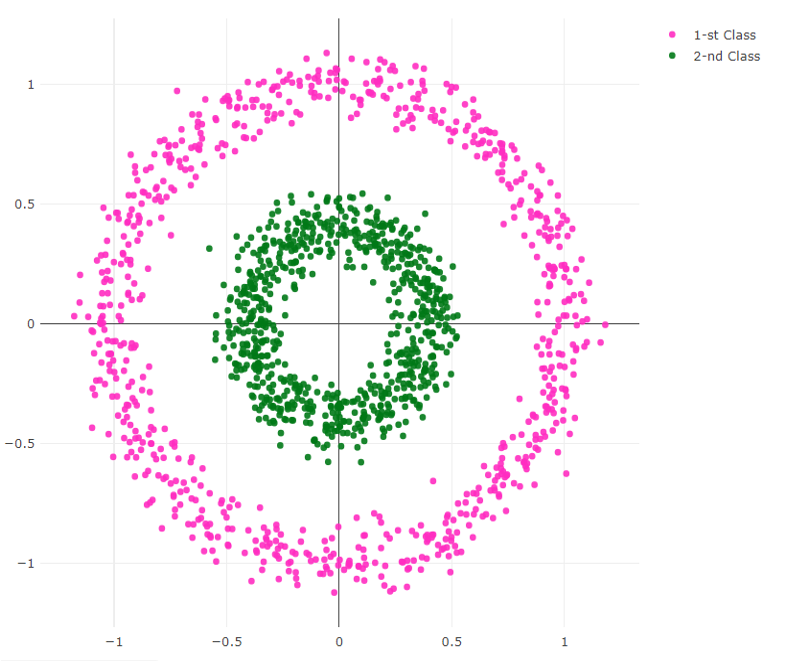

In [222]:
def generate_data(radius, num_points, point_class, noise_level=0.05):
    theta = np.linspace(0, 2 * np.pi, num_points)
    x = radius * np.cos(theta) + np.random.normal(0, noise_level, num_points)
    y = radius * np.sin(theta) + np.random.normal(0, noise_level, num_points)
    return [{'x': xi, 'y': yi, 'class': point_class} for xi, yi in zip(x, y)]

def create_dataset(params):
    data = []
    for param in params:
        data.extend(generate_data(param['radius'], param['num_points'], param['class'], param['noise_level']))
    return pd.DataFrame(data)

params = [
    {'radius': 0.6, 'num_points': 500, 'class': '1', 'noise_level': 0.05},
    {'radius': 1.0, 'num_points': 500, 'class': '2', 'noise_level': 0.05}
]

dataset = create_dataset(params)
dataset.to_csv('practice2.csv', index=False)

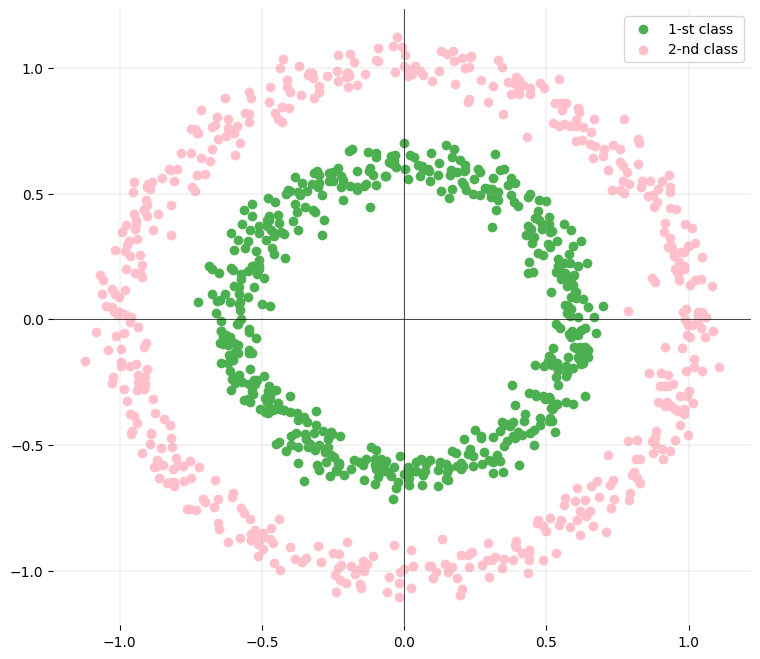

In [223]:
def plot_2d_scatter(dataset, classes, colors, figsize=(9, 8)):
    plt.figure(figsize=figsize)
    
    for point_class, color in zip(classes, colors):
        class_data = dataset[dataset['class'] == point_class]
        plt.scatter(class_data['x'], class_data['y'], color=color, label=f'{point_class}-st class' if point_class == '1' else f'{point_class}-nd class')
    
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(True, which='both', linewidth=0.2)
    plt.legend()
    plt.box(False)
    plt.show()


classes = ['1', '2']
colors = ['#4CAF50', '#FFC0CB']
plot_2d_scatter(dataset, classes, colors)


**Завдання 4: Синтезувати набір даних, який складається з двох множин, що утворюють подвійну спіраль, де одна спіраль огортає іншу.**

**Роз'яснення до завдання 4:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві спіралі, закручені одна в іншу, так щоб кожна спіраль відповідала одному з класів.
   - Спіралі повинні мати протилежні напрямки закручування (одна за годинниковою стрілкою, інша — проти).
   - Кожна спіраль повинна бути рівномірно заповнена точками з невеликим додаванням шуму для варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох спіралей, щоб візуалізувати структуру "спіраль у спіралі".
   - Проаналізуйте відмінності у розподілі точок для обох класів та оцініть складність їх розділення.

5. **Додаткові умови:**
   - Створіть окремі графіки, що показують як закручується кожна спіраль.
   - Опишіть процес генерації даних, включаючи параметри, що використовувалися для визначення форми спіралей.

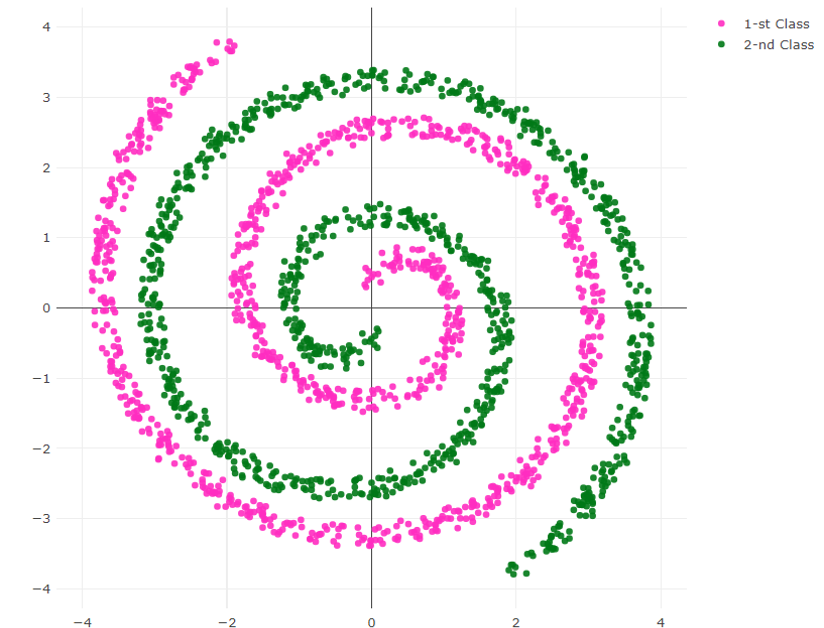

In [224]:
def generate_data(num_points, point_class, a, b, noise_level):
    theta = np.linspace(0, 4 * np.pi, num_points)
    r = a + b * theta
    x = r * np.cos(theta) + np.random.normal(0, noise_level, num_points)
    y = r * np.sin(theta) + np.random.normal(0, noise_level, num_points)
    return [{'x': xi, 'y': yi, 'class': point_class} for xi, yi in zip(x, y)]

def create_dataset(params):
    data = []
    for param in params:
        data.extend(generate_data(
            param['num_points'], 
            param['class'], 
            param['a'], 
            param['b'], 
            param['noise_level']
        ))
    return pd.DataFrame(data)

params = [
    {'num_points': 500, 'class': '1', 'a': 2, 'b': 2, 'noise_level': 0.4},
    {'num_points': 500, 'class': '2', 'a': -2, 'b': -2, 'noise_level': 0.4}
]

dataset = create_dataset(params)
dataset.to_csv('practice2.csv', index=False)


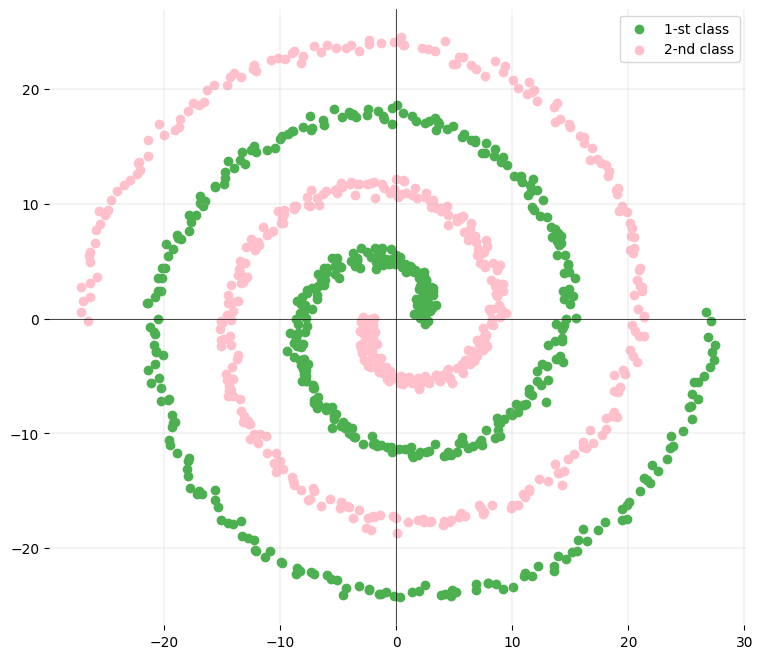

In [225]:
def plot_2d_scatter(dataset, classes, colors, figsize=(9, 8)):
    plt.figure(figsize=figsize)
    
    for point_class, color in zip(classes, colors):
        class_data = dataset[dataset['class'] == point_class]
        plt.scatter(class_data['x'], class_data['y'], color=color, label=f'{point_class}-st class' if point_class == '1' else f'{point_class}-nd class')
    
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(True, which='both', linewidth=0.2)
    plt.legend()
    plt.box(False)
    plt.show()

classes = ['1', '2']
colors = ['#4CAF50', '#FFC0CB']
plot_2d_scatter(dataset, classes, colors)


**Завдання 5: Синтезувати кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами, дослідити вплив параметрів на динаміку системи та візуалізувати результати.**


### 5.1: Теоретичне підґрунтя

**Опис системи Лоренца:**
Система Лоренца — це набір трьох нелінійних диференціальних рівнянь, що описують динаміку тривимірної системи з хаотичною поведінкою. Вона визначається такими рівняннями:

$$
\frac{dx}{dt} = \sigma (y - x)
$$

$$
\frac{dy}{dt} = x (\rho - z) - y
$$

$$
\frac{dz}{dt} = xy - \beta z
$$

Де:
- $(x, y, z)$ — змінні стану системи.
- $\sigma$ — параметр, що відповідає за швидкість зміни (часто називають "параметр Прандтля").
- $\rho$ — параметр, що відповідає за різницю температур у системі (відповідає за інтенсивність конвекції).
- $\beta$  — параметр, що відповідає за співвідношення розмірів.

**Роз'яснення до завдання:**
- Згенерувати дані для системи Лоренца за допомогою різних значень параметрів $\sigma$, $\rho$ та $\beta$.
- Проаналізувати вплив зміни параметрів на траєкторії системи.
- Візуалізувати результати в тривимірному просторі для кожного набору даних.

### 5.2: Генерація та візуалізація набору даних

**Що треба зробити:**

1. **Генерація даних:**
   - Вибрати декілька різних комбінацій параметрів $\sigma$, $\rho$ та $\beta$.
   - Використовуючи числовий метод (наприклад, метод Рунге-Кутти 4-го порядку), згенерувати траєкторії системи Лоренца для кожного набору параметрів.

2. **Візуалізація:**
   - Для кожного набору параметрів побудувати тривимірні графіки траєкторій.
   - Відобразити траєкторії в просторі $(x, y, z)$.

3. **Аналіз:**
   - Порівняти результати для різних наборів параметрів.
   - Описати, як зміна кожного з параметрів впливає на поведінку системи (наприклад, перехід від стабільного до хаотичного режиму).

**Очікуваний результат:**
- Кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами (мінімум 3).
- Візуалізації цих траєкторій у тривимірному просторі.
- Аналіз і опис впливу параметрів на динаміку системи.

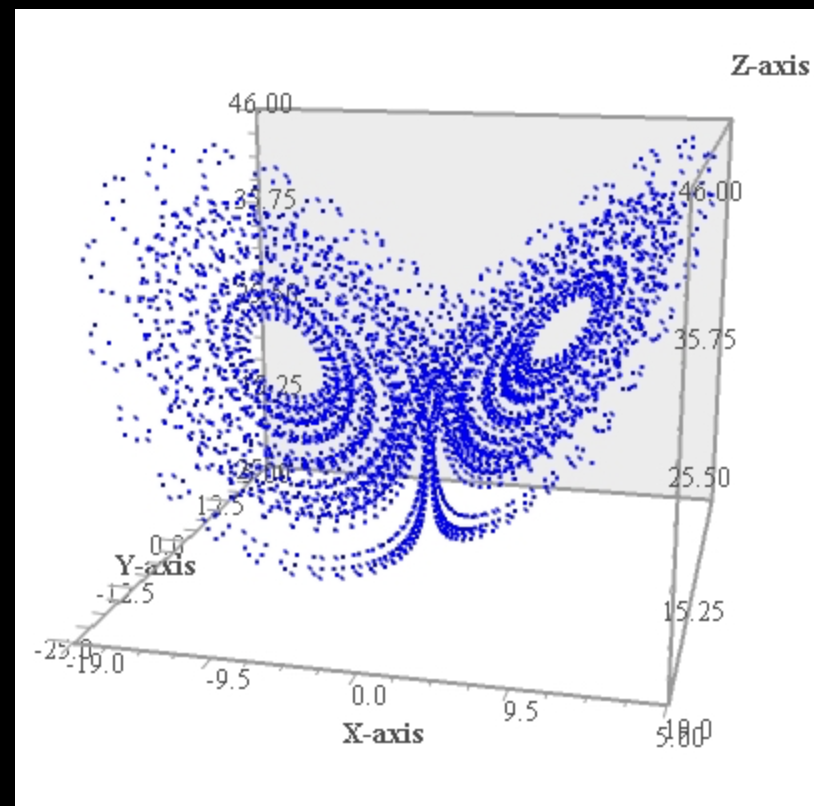

In [226]:
def generate_data(num_points, sigma_range=(5, 15), rho_range=(20, 40), beta_range=(2, 6)):
    data = [
        {
            'sigma': np.random.uniform(*sigma_range), 
            'rho': np.random.uniform(*rho_range), 
            'beta': np.random.uniform(*beta_range)
        } 
        for _ in range(num_points)
    ]
    return data

def create_and_save_dataset(num_points, filename, sigma_range=(5, 15), rho_range=(20, 40), beta_range=(2, 6)):
    data = generate_data(num_points, sigma_range, rho_range, beta_range)
    dataset = pd.DataFrame(data)
    dataset.to_csv(filename, index=False)
create_and_save_dataset(10, 'practice2_task3.csv')


In [227]:
def lorenz(xyz, sigma, rho, beta):
    x, y, z = xyz
    x_dot = sigma * (y - x)
    y_dot = rho * x - y - x * z
    z_dot = x * y - beta * z
    return np.array([x_dot, y_dot, z_dot])


In [228]:
def lorenz(xyz, sigma, rho, beta):
    x, y, z = xyz
    x_dot = sigma * (y - x)
    y_dot = rho * x - y - x * z
    z_dot = x * y - beta * z
    return np.array([x_dot, y_dot, z_dot])

def simulate_lorenz(params, num_steps=10000, dt=0.01, initial_state=(0., 1., 1.05)):
    sigma, rho, beta = params
    xyzs = np.empty((num_steps + 1, 3))
    xyzs[0] = initial_state
    
    for i in range(num_steps):
        xyzs[i + 1] = xyzs[i] + lorenz(xyzs[i], sigma, rho, beta) * dt
    return xyzs

dataset = pd.read_csv('practice2_task3.csv')
params = dataset.iloc[0][['sigma', 'rho', 'beta']].values
xyzs = simulate_lorenz(params)

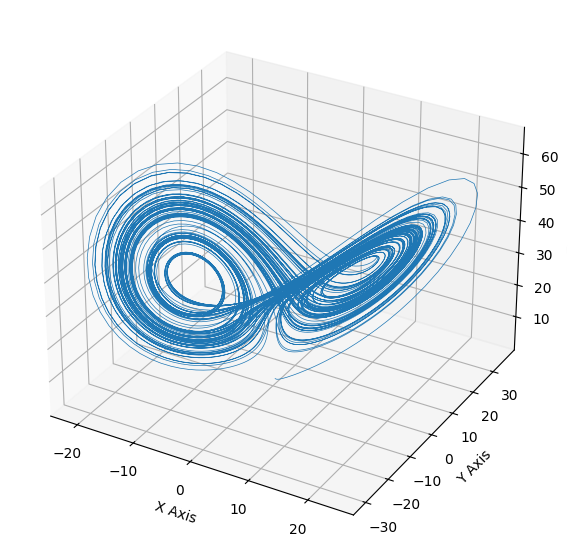

In [229]:
def lorenz_trajectory(xyzs, figsize=(10, 7), line_width=0.5):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(projection='3d')
    
    ax.plot(xyzs[:, 0], xyzs[:, 1], xyzs[:, 2], lw=line_width)
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")
    plt.show()
    
lorenz_trajectory(xyzs)
